# Task 1: Exploratory Data Analysis (EDA) and Business Insights
1. Perform EDA on the provided dataset.
2. Derive at least 5 business insights from the EDA.

In [35]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up seaborn style
sns.set(style="whitegrid")

# Loading datasets
customers = pd.read_csv(r'/content/Customers.csv')
products = pd.read_csv(r'/content/Products.csv')
transactions = pd.read_csv(r'/content/Transactions.csv')


In [36]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,10-07-2022
1,C0002,Elizabeth Lutz,Asia,13-02-2022
2,C0003,Michael Rivera,South America,07-03-2024
3,C0004,Kathleen Rodriguez,South America,09-10-2022
4,C0005,Laura Weber,Asia,15-08-2022


In [37]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [38]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,25-08-2024 12:38,1,300.68,300.68
1,T00112,C0146,P067,27-05-2024 22:23,1,300.68,300.68
2,T00166,C0127,P067,25-04-2024 07:38,1,300.68,300.68
3,T00272,C0087,P067,26-03-2024 22:55,2,601.36,300.68
4,T00363,C0070,P067,21-03-2024 15:10,3,902.04,300.68


In [39]:
# Merging datasets
data = transactions.merge(customers, on='CustomerID', how='left') \
                   .merge(products, on='ProductID', how='left')

# Display the first 5 rows of the merged data
print(data.head())


  TransactionID CustomerID ProductID   TransactionDate  Quantity  TotalValue  \
0        T00001      C0199      P067  25-08-2024 12:38         1      300.68   
1        T00112      C0146      P067  27-05-2024 22:23         1      300.68   
2        T00166      C0127      P067  25-04-2024 07:38         1      300.68   
3        T00272      C0087      P067  26-03-2024 22:55         2      601.36   
4        T00363      C0070      P067  21-03-2024 15:10         3      902.04   

   Price_x     CustomerName         Region  SignupDate  \
0   300.68   Andrea Jenkins         Europe  03-12-2022   
1   300.68  Brittany Harvey           Asia  04-09-2024   
2   300.68  Kathryn Stevens         Europe  04-04-2024   
3   300.68  Travis Campbell  South America  11-04-2024   
4   300.68    Timothy Perez         Europe  15-03-2022   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronics   30

# Exploratory Data Analysis (EDA)

In [40]:
data['Price'] = data['Price_x']  # Retain Price_x
data.drop(['Price_x', 'Price_y'], axis=1, inplace=True)  # Drop duplicate columns

# Display the updated columns
print("Updated Columns:", data.columns)

# Display the first 5 rows of the cleaned dataset
print(data.head())

Updated Columns: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'CustomerName', 'Region', 'SignupDate',
       'ProductName', 'Category', 'Price'],
      dtype='object')
  TransactionID CustomerID ProductID   TransactionDate  Quantity  TotalValue  \
0        T00001      C0199      P067  25-08-2024 12:38         1      300.68   
1        T00112      C0146      P067  27-05-2024 22:23         1      300.68   
2        T00166      C0127      P067  25-04-2024 07:38         1      300.68   
3        T00272      C0087      P067  26-03-2024 22:55         2      601.36   
4        T00363      C0070      P067  21-03-2024 15:10         3      902.04   

      CustomerName         Region  SignupDate  \
0   Andrea Jenkins         Europe  03-12-2022   
1  Brittany Harvey           Asia  04-09-2024   
2  Kathryn Stevens         Europe  04-04-2024   
3  Travis Campbell  South America  11-04-2024   
4    Timothy Perez         Europe  15-03-2022   

In [41]:
print(data.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'CustomerName', 'Region', 'SignupDate',
       'ProductName', 'Category', 'Price'],
      dtype='object')


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   CustomerName     1000 non-null   object 
 7   Region           1000 non-null   object 
 8   SignupDate       1000 non-null   object 
 9   ProductName      1000 non-null   object 
 10  Category         1000 non-null   object 
 11  Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [43]:
data[data.isnull().any(axis=1)]

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,Price


In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,1000.0,2.53700,1.117981,1.00,2.000,3.00,4.00,4.00
TotalValue,1000.0,689.99556,493.144478,16.08,295.295,588.88,1011.66,1991.04
Price,1000.0,272.55407,140.736390,16.08,147.950,299.93,404.40,497.76


# Visualization

In [47]:
# 1. Basic statistics and data overview
print("Data Overview:\n", data.info())
print("\nSummary Statistics:\n", data.describe())
print("\nNull Values:\n", data.isnull().sum())

# 2. Total revenue generated
total_revenue = data['TotalValue'].sum()
print(f"\nTotal Revenue: ${total_revenue:.2f}")

# 3. Average transaction value
average_transaction_value = data['TotalValue'].mean()
print(f"\nAverage Transaction Value: ${average_transaction_value:.2f}")

# 4. Top categories by revenue
category_revenue = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nTop Categories by Revenue:\n", category_revenue)

# 5. Regional distribution of customers
region_count = data['Region'].value_counts()
print("\nRegional Distribution of Customers:\n", region_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   CustomerName     1000 non-null   object 
 7   Region           1000 non-null   object 
 8   SignupDate       1000 non-null   object 
 9   ProductName      1000 non-null   object 
 10  Category         1000 non-null   object 
 11  Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB
Data Overview:
 None

Summary Statistics:
           Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.

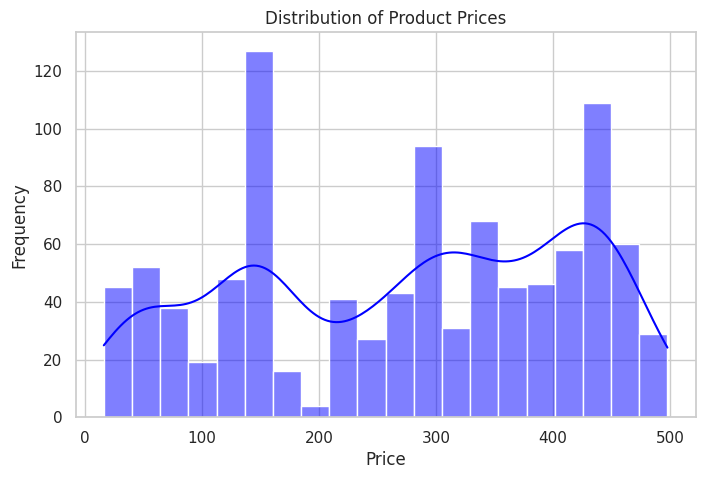

In [48]:
# 1. Distribution of product prices
plt.figure(figsize=(8, 5))
sns.histplot(data['Price'], bins=20, kde=True, color='blue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


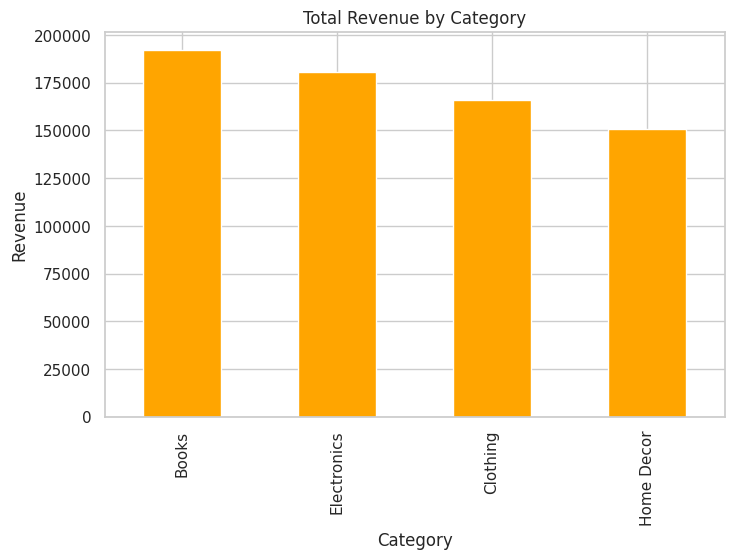

In [49]:
# 2. Total revenue by category
plt.figure(figsize=(8, 5))
category_revenue.plot(kind='bar', color='orange')
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()


<ipython-input-50-5784bb0e95f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Region', palette='Set2')


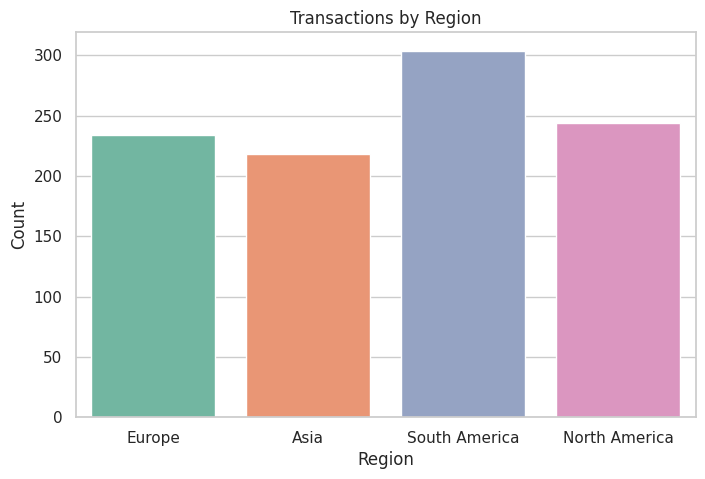

In [50]:
# 3. Transactions by region
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Region', palette='Set2')
plt.title('Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


<ipython-input-51-86af0cccce3d>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])


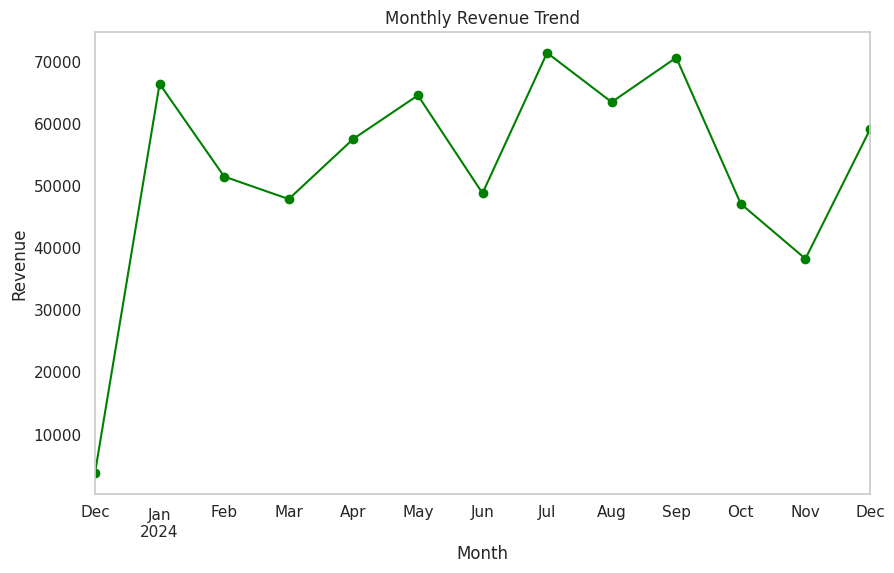

In [51]:
# 4. Revenue trend over time
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
revenue_trend = data.groupby(data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
revenue_trend.plot(kind='line', figsize=(10, 6), marker='o', color='green')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid()
plt.show()


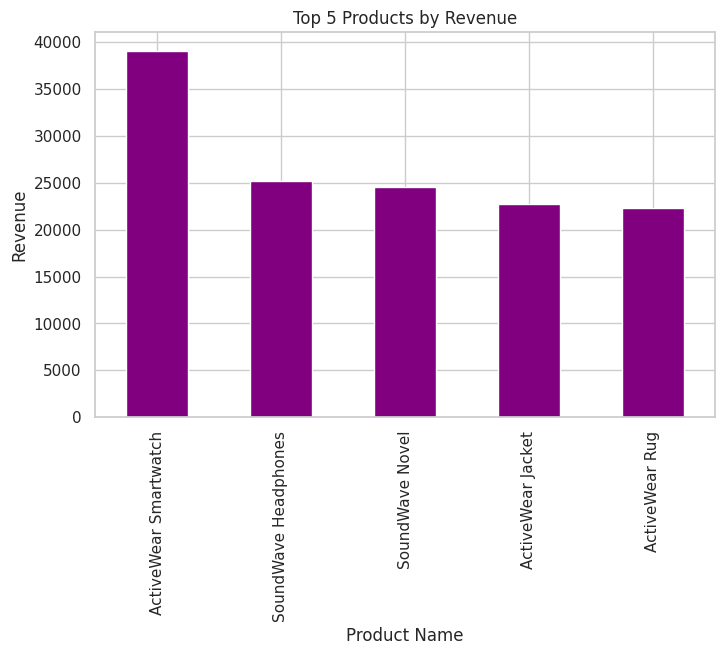

In [52]:
# 5. Top 5 products by revenue
top_products = data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='purple')
plt.title('Top 5 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Revenue')
plt.show()

In [58]:
# Numerical features for analysis
numerical_features = data.select_dtypes(include=[np.number])


In [72]:
numerical_features

,Quantity,TotalValue,Price
0,1,300.68,300.68
1,1,300.68,300.68
2,1,300.68,300.68
3,2,601.36,300.68
4,3,902.04,300.68
...,...,...,...
995,1,459.86,459.86
996,3,1379.58,459.86
997,4,1839.44,459.86
998,2,919.72,459.86


In [ ]:
# Categorical features for analysis
categorical_features = data.select_dtypes(include=['object']).columns

In [73]:
categorical_features

Index(['TransactionID', 'CustomerID', 'ProductID', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category'],
      dtype='object')

In [62]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [63]:
plt.style.use('seaborn-v0_8-darkgrid')

# Visualization

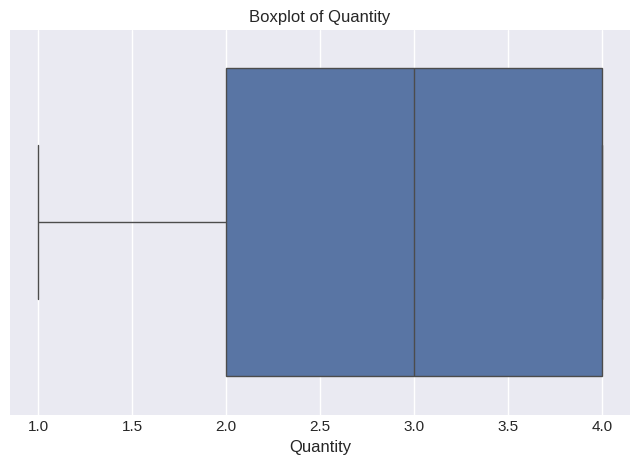

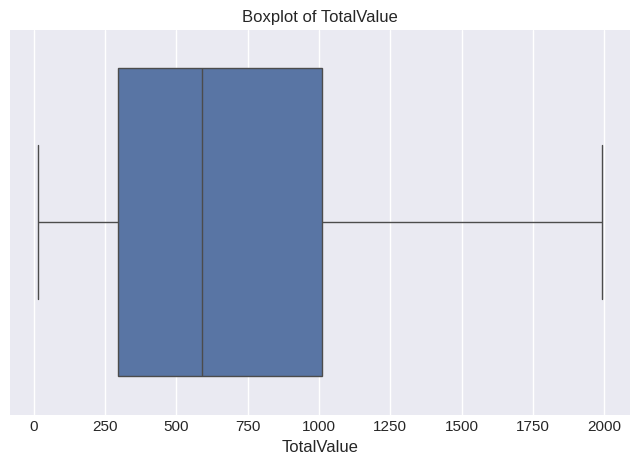

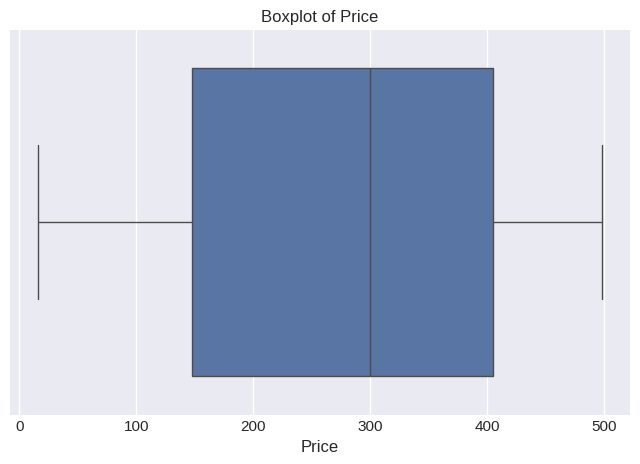

In [66]:
# Visualization: Boxplots for Outliers
for col in numerical_features.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

<ipython-input-79-1295044b097b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=data, palette='pastel')


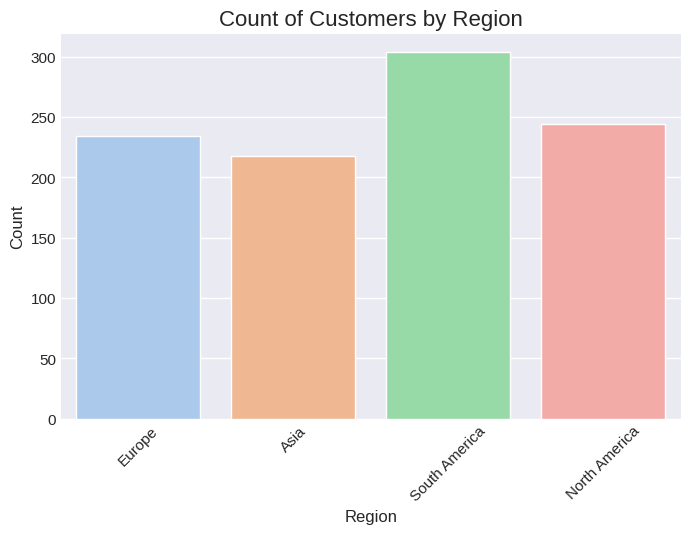

In [79]:
# Visualize categorical features
# Bar plot for Region
plt.figure(figsize=(8, 5))
sns.countplot(x='Region', data=data, palette='pastel')
plt.title('Count of Customers by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-80-16bf927432f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=data, palette='muted')


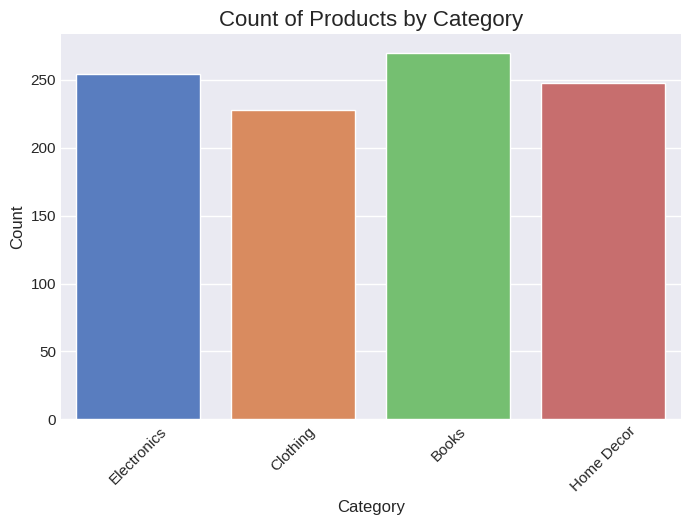

In [80]:
# Bar plot for Category
plt.figure(figsize=(8, 5))
sns.countplot(x='Category', data=data, palette='muted')
plt.title('Count of Products by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


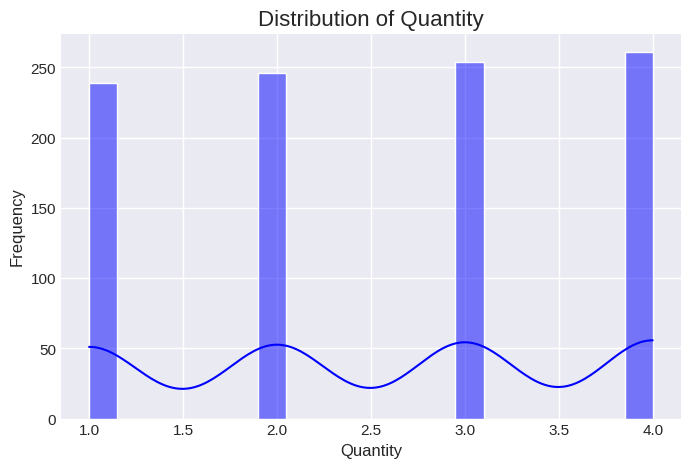

In [81]:
# Visualize numerical features
# Histogram and density plot for Quantity
plt.figure(figsize=(8, 5))
sns.histplot(data['Quantity'], kde=True, color='blue', bins=20)
plt.title('Distribution of Quantity', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

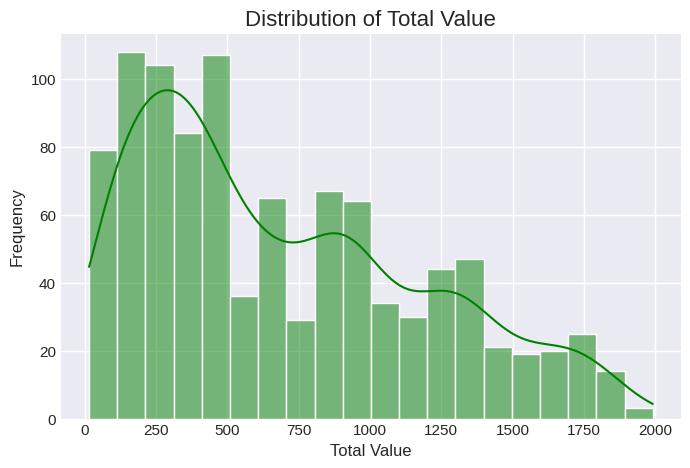

In [82]:
# Histogram and density plot for TotalValue
plt.figure(figsize=(8, 5))
sns.histplot(data['TotalValue'], kde=True, color='green', bins=20)
plt.title('Distribution of Total Value', fontsize=16)
plt.xlabel('Total Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

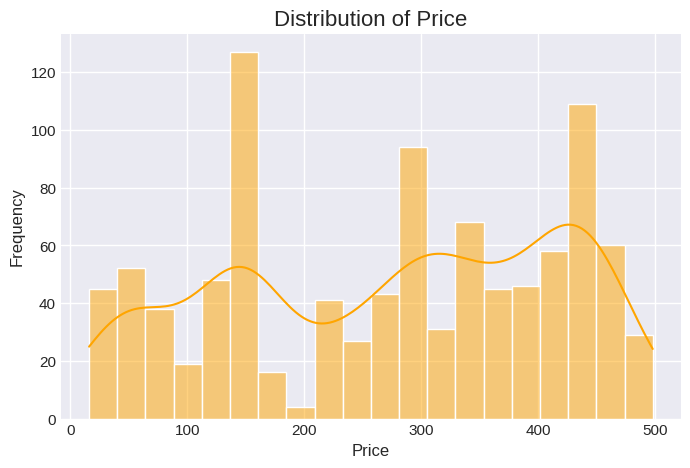

In [83]:
# Histogram and density plot for Price
plt.figure(figsize=(8, 5))
sns.histplot(data['Price'], kde=True, color='orange', bins=20)
plt.title('Distribution of Price', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<ipython-input-84-536679ab1b54>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Quantity', data=data, palette='pastel')


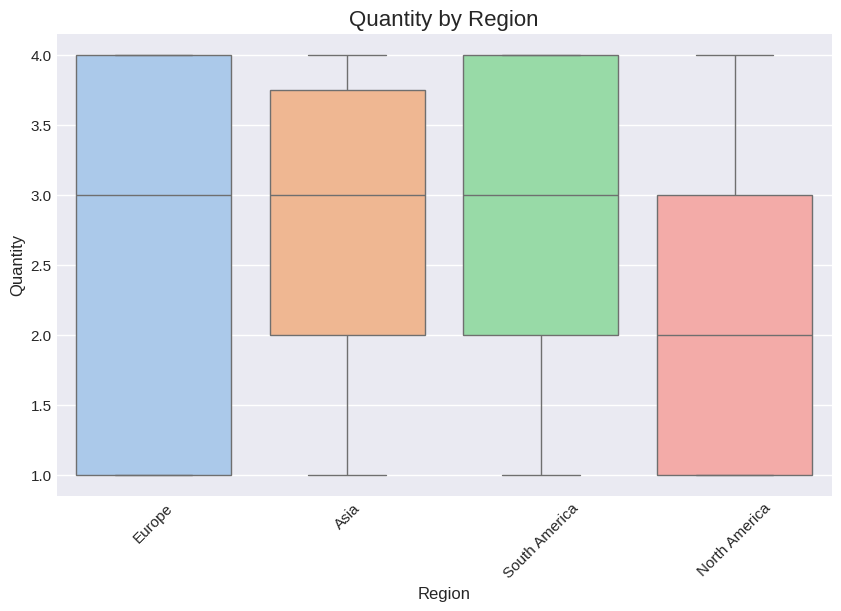

<ipython-input-84-536679ab1b54>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='TotalValue', data=data, palette='muted')


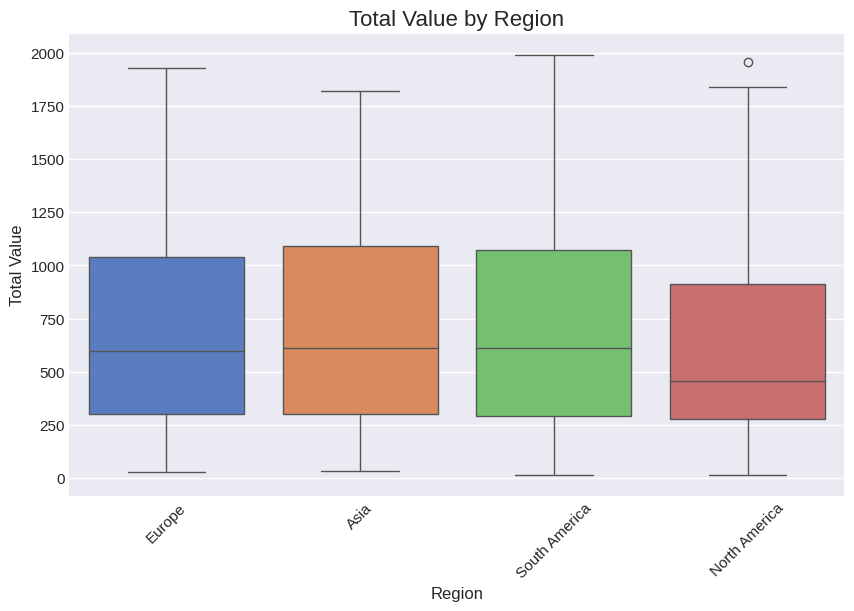

In [84]:
# Box plots for numerical features by Region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Quantity', data=data, palette='pastel')
plt.title('Quantity by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='TotalValue', data=data, palette='muted')
plt.title('Total Value by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Value', fontsize=12)
plt.xticks(rotation=45)
plt.show()

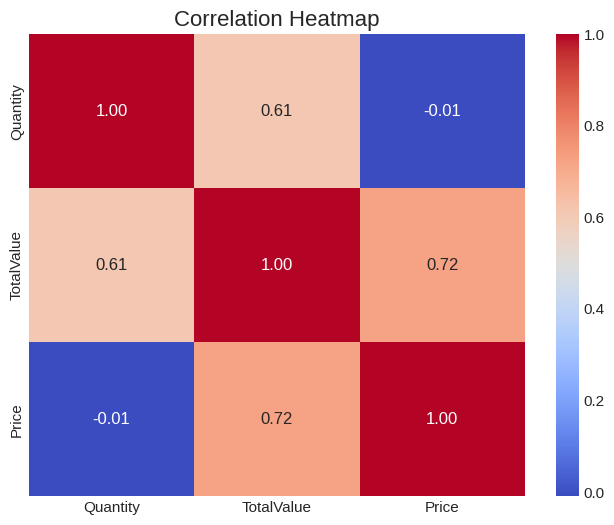

In [85]:
# Correlation heatmap for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Quantity', 'TotalValue', 'Price']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


In [87]:
# Multicollinearity Check
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]

print("Variance Inflation Factor:")
print(vif_data)

Variance Inflation Factor:
      Feature       VIF
0    Quantity  4.713278
1  TotalValue  9.971386
2       Price  6.196130


In [88]:
data.head(2)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,Price
0,T00001,C0199,P067,2024-08-25 12:38:00,1,300.68,Andrea Jenkins,Europe,03-12-2022,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:00,1,300.68,Brittany Harvey,Asia,04-09-2024,ComfortLiving Bluetooth Speaker,Electronics,300.68
